In [1]:
%run dataset.py
%matplotlib inline

from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms
import numpy as np
from PIL import ImageStat
import matplotlib.pyplot as plt
import random

In [2]:
'''
dataset = CXRDataset('dataset', dataset_type='train')

mean = np.zeros(3)
for i in range(len(dataset)):
    image = dataset[i][0]
    stat = ImageStat.Stat(image)
    mean += np.array(stat.mean)
    print('\r{:.2f}%'.format(100*i/len(dataset)), end='\r')
mean /= len(dataset)*255
print(mean) # 0.50576189
'''
print(0.50576189)

0.50576189


In [3]:
def show_tensor_image(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.50576189, 0.50576189, 0.50576189])
    inp = inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)

In [15]:
trans = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.50576189, 0.50576189, 0.50576189], [1., 1., 1.])
])
dataset = CXRDataset('dataset', dataset_type='train', transform=trans)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True, num_workers=4)
images, labels, names, bboxes, bbox_valids = next(iter(dataloader))
label_string = []
for label in labels:
    t = ''
    for i, d in enumerate(label):
        if d == 1: t += dataset.classes[i]+'|'
    if t == '': t = 'no finding'
    else: t = t[:-1]
    label_string.append(t)

name: 00009918_006.png


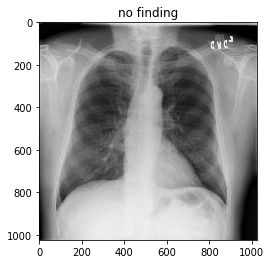

In [16]:
show_tensor_image(images[0], title=label_string[0])
print('name: '+names[0])

name: 00007321_007.png


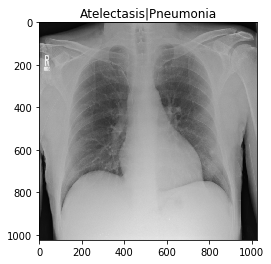

In [17]:
show_tensor_image(images[1], title=label_string[1])
print('name: '+names[1])

In [18]:
print(images.shape)
print(labels.shape)

torch.Size([2, 1, 1024, 1024])
torch.Size([2, 8])


In [19]:
print(images)
print(labels)
print(names)

tensor([[[[ 0.2982,  0.2942,  0.2903,  ...,  0.3805,  0.4158,  0.0864],
          [ 0.2903,  0.2786,  0.2786,  ...,  0.3491,  0.3766,  0.0707],
          [ 0.2629,  0.2550,  0.2433,  ...,  0.3452,  0.3805,  0.0746],
          ...,
          [-0.5058, -0.5058, -0.5058,  ..., -0.4430, -0.4548, -0.5058],
          [-0.5058, -0.5058, -0.5058,  ..., -0.4430, -0.4548, -0.5058],
          [-0.5058, -0.5058, -0.5058,  ..., -0.4430, -0.4548, -0.5058]]],


        [[[-0.5018, -0.5018, -0.5018,  ..., -0.5018, -0.5018, -0.5018],
          [-0.5058, -0.5058, -0.5058,  ..., -0.5058, -0.5058, -0.5058],
          [-0.4783, -0.4665, -0.4665,  ..., -0.3371, -0.2822, -0.3607],
          ...,
          [-0.4665, -0.4352, -0.4391,  ..., -0.4469, -0.4430, -0.4705],
          [-0.4665, -0.4273, -0.4313,  ..., -0.4430, -0.4430, -0.4705],
          [-0.4862, -0.4665, -0.4665,  ..., -0.4744, -0.4744, -0.4862]]]])
tensor([[ 0,  0,  0,  0,  0,  0,  0,  0],
        [ 1,  0,  0,  0,  0,  0,  1,  0]])
('00009918_006

In [20]:
datasets = {x: CXRDataset('dataset', dataset_type=x, transform=trans) for x in ['train', 'val', 'test']}
print(dataset.classes)
for x in ['train', 'val', 'test']:
    print('%s: %d'%(x, len(datasets[x])))

['Atelectasis' 'Cardiomegaly' 'Effusion' 'Infiltration' 'Mass' 'Nodule'
 'Pneumonia' 'Pneumothorax' 'Consolidation' 'Edema' 'Emphysema' 'Fibrosis'
 'Pleural_Thickening' 'Hernia']
train: 75714
val: 10810
test: 25596


## BBox

In [33]:
trans = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.50576189, 0.50576189, 0.50576189], [1., 1., 1.])
])
dataset_bbox_only = CXRDataset_BBox_only('dataset', transform=trans)
dataloader_bbox_only = DataLoader(dataset_bbox_only, batch_size=1, shuffle=True, num_workers=4)
images, labels, names, bboxes, bbox_valids = next(iter(dataloader_bbox_only))
print(bboxes.shape)
print(bbox_valids.shape)

torch.Size([1, 8, 1024, 1024])
torch.Size([1, 8])


bbox_valid :[ 1.  1.  1.  0.  1.  1.  1.  1.]


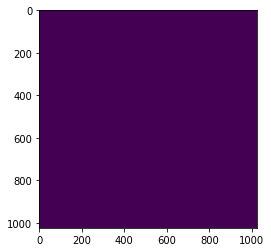

In [34]:
print('bbox_valid :'+str(bbox_valids[0].numpy()))
plt.imshow(bboxes[0][0])

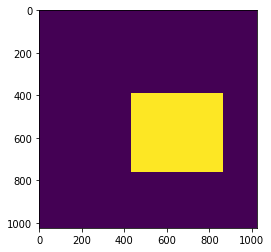

In [35]:
plt.imshow(bboxes[0][1])

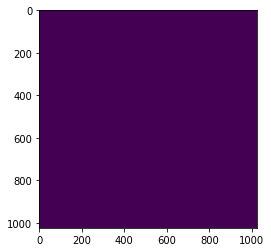

In [36]:
plt.imshow(bboxes[0][2])

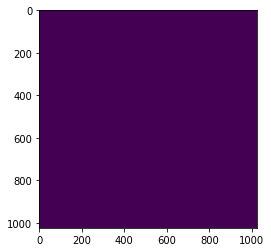

In [37]:
plt.imshow(bboxes[0][3])